In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [2]:
df = pd.read_csv('sonar_dataset.csv',header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


In [3]:
df.isna().sum()

0     0
1     0
2     0
3     0
4     0
     ..
56    0
57    0
58    0
59    0
60    0
Length: 61, dtype: int64

In [4]:
df[60].unique()

array(['R', 'M'], dtype=object)

In [5]:
df[60].replace({'R' : 0, 'M' : 1},inplace = True)
df[60].unique()

array([0, 1], dtype=int64)

In [6]:
x = df.drop([60],axis = 1)
y = df[60]

In [7]:
x

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0203,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0051,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0155,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0042,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048


In [8]:
y

0      0
1      0
2      0
3      0
4      0
      ..
203    1
204    1
205    1
206    1
207    1
Name: 60, Length: 208, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state= 10)

In [10]:
x_train.shape

(166, 60)

# Model without Dropout Layer

In [11]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (60,)),
    keras.layers.Dense(60, activation='relu'),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer = "adam",
    loss = "binary_crossentropy",
    metrics = ["accuracy"]
)

In [12]:
model.fit(x_train,y_train,epochs = 100)

Epoch 1/100
6/6 [==============================] - 0s 3ms/step - loss: 0.6871 - accuracy: 0.5602
Epoch 2/100
6/6 [==============================] - 0s 0s/step - loss: 0.6694 - accuracy: 0.5602
Epoch 3/100
6/6 [==============================] - 0s 769us/step - loss: 0.6586 - accuracy: 0.5602
Epoch 4/100
6/6 [==============================] - 0s 0s/step - loss: 0.6475 - accuracy: 0.5602
Epoch 5/100
6/6 [==============================] - 0s 2ms/step - loss: 0.6341 - accuracy: 0.5723
Epoch 6/100
6/6 [==============================] - 0s 3ms/step - loss: 0.6235 - accuracy: 0.6265
Epoch 7/100
6/6 [==============================] - 0s 3ms/step - loss: 0.6119 - accuracy: 0.6747
Epoch 8/100
6/6 [==============================] - 0s 2ms/step - loss: 0.5983 - accuracy: 0.6747
Epoch 9/100
6/6 [==============================] - 0s 3ms/step - loss: 0.5815 - accuracy: 0.7108
Epoch 10/100
6/6 [==============================] - 0s 2ms/step - loss: 0.5680 - accuracy: 0.7289
Epoch 11/100
6/6 [===========

6/6 [==============================] - 0s 2ms/step - loss: 0.0938 - accuracy: 0.9759
Epoch 85/100
6/6 [==============================] - 0s 2ms/step - loss: 0.0966 - accuracy: 0.9819
Epoch 86/100
6/6 [==============================] - 0s 2ms/step - loss: 0.0939 - accuracy: 0.9940
Epoch 87/100
6/6 [==============================] - 0s 2ms/step - loss: 0.0909 - accuracy: 0.9699
Epoch 88/100
6/6 [==============================] - 0s 2ms/step - loss: 0.1000 - accuracy: 0.9819
Epoch 89/100
6/6 [==============================] - 0s 2ms/step - loss: 0.0825 - accuracy: 0.9940
Epoch 90/100
6/6 [==============================] - 0s 2ms/step - loss: 0.0830 - accuracy: 0.9819
Epoch 91/100
6/6 [==============================] - 0s 2ms/step - loss: 0.0902 - accuracy: 0.9880
Epoch 92/100
6/6 [==============================] - 0s 2ms/step - loss: 0.0778 - accuracy: 0.9819
Epoch 93/100
6/6 [==============================] - 0s 2ms/step - loss: 0.0761 - accuracy: 0.9940
Epoch 94/100
6/6 [===============

In [13]:
model.evaluate(x_test,y_test)

2/2 [==============================] - 0s 8ms/step - loss: 0.8181 - accuracy: 0.7381


[0.8180838823318481, 0.738095223903656]

In [14]:
y_predicted = model.predict(x_test)

2/2 [==============================] - 0s 0s/step


In [15]:
y_pred = []
for i in y_predicted:
    if(i < 0.5):
        y_pred.append(0)
    else:
        y_pred.append(1)

In [16]:
y_pred[:10]

[0, 0, 1, 1, 0, 1, 0, 1, 1, 0]

In [17]:
y_test[:10]

58     0
63     0
35     0
19     0
59     0
56     0
83     0
105    1
121    1
76     0
Name: 60, dtype: int64

In [18]:
y_pred[10:20]

[1, 1, 0, 0, 0, 1, 0, 1, 1, 1]

In [19]:
y_test[10:20]

206    1
132    1
5      0
55     0
78     0
117    1
70     0
46     0
142    1
1      0
Name: 60, dtype: int64

In [20]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.62      0.73        24
           1       0.64      0.89      0.74        18

    accuracy                           0.74        42
   macro avg       0.76      0.76      0.74        42
weighted avg       0.78      0.74      0.74        42



Text(69.0, 0.5, 'Truth')

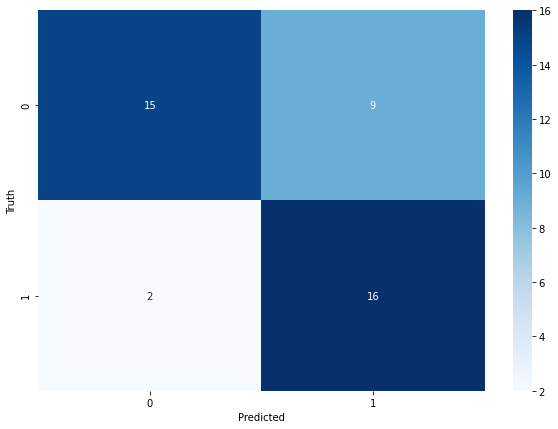

In [21]:
cm = tf.math.confusion_matrix(y_test,y_pred)
plt.figure(figsize = (10,7))
sns.heatmap(cm,annot = True,fmt = 'd',cmap='Blues')

plt.xlabel('Predicted')
plt.ylabel('Truth')

# Model with Dropout Layer

In [22]:
model_dropout = keras.Sequential([
    keras.layers.Flatten(input_shape = (60,)),
    keras.layers.Dense(60, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

model_dropout.compile(
    optimizer = "adam",
    loss = "binary_crossentropy",
    metrics = ["accuracy"]
)

In [23]:
model_dropout.fit(x_train,y_train,epochs = 100)

Epoch 1/100
6/6 [==============================] - 1s 2ms/step - loss: 0.6792 - accuracy: 0.6145
Epoch 2/100
6/6 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5542
Epoch 3/100
6/6 [==============================] - 0s 2ms/step - loss: 0.6976 - accuracy: 0.5361
Epoch 4/100
6/6 [==============================] - 0s 2ms/step - loss: 0.6936 - accuracy: 0.5422
Epoch 5/100
6/6 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.5181
Epoch 6/100
6/6 [==============================] - 0s 2ms/step - loss: 0.7008 - accuracy: 0.5361
Epoch 7/100
6/6 [==============================] - 0s 2ms/step - loss: 0.6829 - accuracy: 0.5723
Epoch 8/100
6/6 [==============================] - 0s 2ms/step - loss: 0.6909 - accuracy: 0.5361
Epoch 9/100
6/6 [==============================] - 0s 2ms/step - loss: 0.6990 - accuracy: 0.4699
Epoch 10/100
6/6 [==============================] - 0s 2ms/step - loss: 0.7012 - accuracy: 0.5482
Epoch 11/100
6/6 [===========

6/6 [==============================] - 0s 2ms/step - loss: 0.5272 - accuracy: 0.7289
Epoch 85/100
6/6 [==============================] - 0s 2ms/step - loss: 0.5121 - accuracy: 0.7410
Epoch 86/100
6/6 [==============================] - 0s 2ms/step - loss: 0.5055 - accuracy: 0.7590
Epoch 87/100
6/6 [==============================] - 0s 2ms/step - loss: 0.5545 - accuracy: 0.7169
Epoch 88/100
6/6 [==============================] - 0s 0s/step - loss: 0.5355 - accuracy: 0.6988
Epoch 89/100
6/6 [==============================] - 0s 2ms/step - loss: 0.4992 - accuracy: 0.7651
Epoch 90/100
6/6 [==============================] - 0s 2ms/step - loss: 0.5024 - accuracy: 0.7711
Epoch 91/100
6/6 [==============================] - 0s 0s/step - loss: 0.4961 - accuracy: 0.7349
Epoch 92/100
6/6 [==============================] - 0s 2ms/step - loss: 0.4971 - accuracy: 0.7229
Epoch 93/100
6/6 [==============================] - 0s 2ms/step - loss: 0.5280 - accuracy: 0.7169
Epoch 94/100
6/6 [=================

In [24]:
model_dropout.evaluate(x_test,y_test)

2/2 [==============================] - 0s 0s/step - loss: 0.5670 - accuracy: 0.7619


[0.5669739842414856, 0.761904776096344]

In [25]:
y_predicted_dropout = model_dropout.predict(x_test)

2/2 [==============================] - 0s 0s/step


In [26]:
y_pred_dropout = []
for i in y_predicted_dropout:
    if(i < 0.5):
        y_pred_dropout.append(0)
    else:
        y_pred_dropout.append(1)

In [27]:
y_pred_dropout[10:20]

[1, 1, 0, 0, 0, 1, 0, 0, 1, 1]

In [28]:
y_test[10:20]

206    1
132    1
5      0
55     0
78     0
117    1
70     0
46     0
142    1
1      0
Name: 60, dtype: int64

In [29]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test, y_pred_dropout))

              precision    recall  f1-score   support

           0       0.82      0.75      0.78        24
           1       0.70      0.78      0.74        18

    accuracy                           0.76        42
   macro avg       0.76      0.76      0.76        42
weighted avg       0.77      0.76      0.76        42



Text(69.0, 0.5, 'Truth')

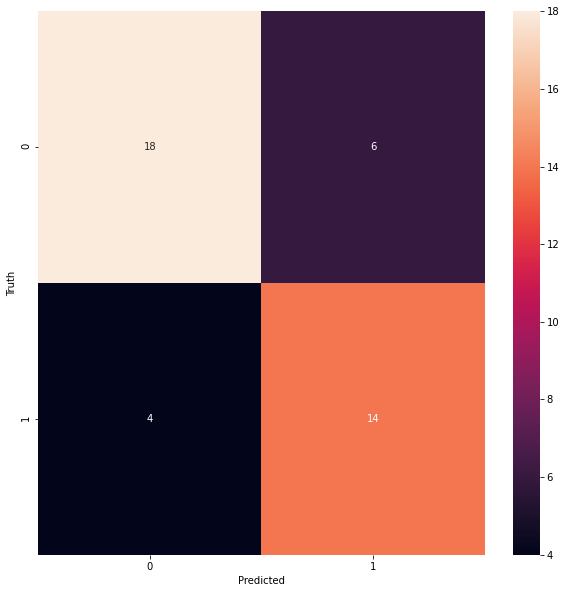

In [30]:
cm = tf.math.confusion_matrix(y_test,y_pred_dropout)

plt.figure(figsize=(10,10))
sns.heatmap(cm, annot = True , fmt = 'd')

plt.xlabel('Predicted')
plt.ylabel('Truth') 

## using dropout layer test accuracy increased from 0.74 to 0.76